For comparison of predicted and ground truth BINARY masks

In [80]:
import numpy as np
import cv2
from glob import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tkinter
from tkinter import filedialog
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
tkinter.Tk().withdraw() # prevents an empty tkinter window from appearing

''

In [81]:
def greater_length(a, b):

    if len(a)>len(b):
        return a
    
    else:
        return b

In [82]:
path1=filedialog.askdirectory(title='CD3P_GT')
path2=filedialog.askdirectory(title='CD3N_GT')

cd3p_gt=sorted(glob(path1+"/*.npy"))
cd3n_gt=sorted(glob(path2+"/*.npy"))


In [83]:
path3=filedialog.askdirectory(title='CD3P_Pred')
path4=filedialog.askdirectory(title='CD3N_Pred')
cd3p_pred=sorted(glob(path3+"/*.npy"))
cd3n_pred=sorted(glob(path4+"/*.npy"))

In [84]:
print(cd3p_gt[:2])
print(cd3p_pred[:2])
print(cd3n_gt[:2])
print(cd3n_pred[:2])

['/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/clear_test/After/Data_Oversampled/npys/Test/gt/bn_nuclei_pred/000000.npy', '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/clear_test/After/Data_Oversampled/npys/Test/gt/bn_nuclei_pred/000001.npy']
['/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/clear_test/After/Data_Oversampled/npys/Test/preds/bn_nuclei_pred/000000.npy', '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/clear_test/After/Data_Oversampled/npys/Test/preds/bn_nuclei_pred/000001.npy']
['/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/clear_test/After/Data_Oversampled/npys/Test/gt/bn_nuclei_pred_n/000000.npy', '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Sa

In [85]:
#Simple check to ensure same non-zero number of images going in
len(cd3p_gt)==len(cd3n_gt)==len(cd3n_pred)==len(cd3p_pred)!=0

True

In [86]:
path_store=filedialog.askdirectory(title='path for csv')

In [87]:
path_store

'/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/clear_test/After/Data_Oversampled/npys/Test/preds'

In [88]:
l_p=[]

lst_p=[]

l_tf_p=[]

lst_n=[]

l_tf_n=[]

data = pd.DataFrame(columns=['Name', 'TP', 'TN', 'FN', 'FP', 'Accuracy', 'F1 Score', 'Sensitivity', 'Specificity'])

for i in range(len(cd3p_gt)):
    
    img1=np.load(cd3p_gt[i])
    v1,c1=np.unique(img1,return_counts=True)
    #print('gt_p:', v1)
    dict1=dict(map(lambda i,j : (i,j) , v1,c1))
    
    img2=np.load(cd3n_gt[i])
    v2,c2=np.unique(img2,return_counts=True)
    dict2=dict(map(lambda i,j : (i,j) , v2,c2))

    img3=np.load(cd3p_pred[i])
    v3,c3=np.unique(img3,return_counts=True)
    dict3=dict(map(lambda i,j : (i,j) , v3,c3))
    
    img4=np.load(cd3n_pred[i])
    v4,c4=np.unique(img4,return_counts=True)
    dict4=dict(map(lambda i,j : (i,j) , v4,c4))
    common_gt=list(set(v1)&set(v2))

    for x in common_gt:
        if(dict1[x]>dict2[x]):
            img2[img2==x]=0
        else:
            img1[img1==x]=0

    
    common_pred=list(set(v3)&set(v4))
    for x in common_pred:
        if(dict3[x]>dict4[x]):
            img4[img4==x]=0
        else:
            img3[img3==x]=0
        
    gt_p = []
    gt_n = []
    pred_p = []
    pred_n = []
    
    gt = []
    pred = []

    # Re-counting after removing any intersecting elements
    v1,c1=np.unique(img1,return_counts=True)
    gt_p = v1[(v1 != 0)]
    
 
    v2,c2=np.unique(img2,return_counts=True)
    gt_n = v2[(v2 != 0)]
    

    v3,c3=np.unique(img3,return_counts=True)
    pred_p = v3[~np.isin(v3, pred_p) & (v3 != 0)]

    
    v4,c4=np.unique(img4,return_counts=True)
    pred_n = v4[~np.isin(v4, pred_n) & (v4 != 0)]

    if len(gt_p)>=0:

        tp = set(gt_p)&set(pred_p)
        tn = set(gt_n)&set(pred_n)
        fn = (set(pred_n)-(set(pred_n)&set(gt_n))).union(set(gt_p)-set(pred_p))
        fp = (set(pred_p)-(set(pred_p)&set(gt_p))).union(set(gt_n)-set(pred_n))
        

        
        #print(len(v4))
        #print("next")
        #img3=img1*np.logical_and(img1,img2)
        
    
        #img6=img4*np.logical_and(img4,img5)

        if not (len(tp)==0 and len(tn)==0 and len(fn)==0 and len(fp)==0):

            if (len(tp)+len(fn))>0 and ((len(tn)+len(fp)))>0 and (len(tp)+len(fp)):

                precision = len(tp)/(len(tp)+len(fp))
                recall = len(tp)/(len(tp)+len(fn))

                if (precision+recall)>0:

                    f1_score = 2*(precision*recall)/(precision+recall)

                    data = data.append({'Name': cd3p_gt[i].split("/")[-1], 'TP': len(tp), 'TN': len(tn), 'FN': len(fn), 'FP': len(fp), 'Accuracy': (len(tp)+len(tn))/(len(tp)+len(tn)+len(fp)+len(fn)), 'F1 Score': f1_score, 'Sensitivity': ((len(tp))/(len(tp)+len(fn))), 'Specificity': ((len(tn))/(len(tn)+len(fp)))}, ignore_index=True)

        
        l_p.append(cd3p_gt[i].split("/")[-1])
        
        lst_p.append(len(v1))
        l_tf_p.append(len(v3))
        #l_tf_p.append(len(set(v1)&set(v3)))
        
    
        
        
        lst_n.append(len(v2))
        l_tf_n.append(len(v4))
        
        #l_tf_n.append(len(set(v2)&set(v4)))
        
#a1=np.average(lst)
#a2=np.average(l_tf)
#lst_p.append(a1)
#l_tf_p.append(a2)
#lst_p.append(a1)
#l_tf_p.append(a2)
#l_p.append("Total")
#path3
data.to_csv(path_store+"/serial_test_17May_intersect.csv",index=False)
df2=pd.DataFrame({'name': l_p,'GT_CD3P':lst_p,'Pred_CD3P':l_tf_p,'GT_CD3N':lst_n,'Pred_CD3N':l_tf_n})
df2.to_csv(path_store+"/serial_test_17May.csv",index=False)

In [89]:
img1=np.load(cd3p_gt[34])
v1,c1=np.unique(img1,return_counts=True)
#print('gt_p:', v1)
dict1=dict(map(lambda i,j : (i,j) , v1,c1))

img2=np.load(cd3n_gt[34])
v2,c2=np.unique(img2,return_counts=True)
dict2=dict(map(lambda i,j : (i,j) , v2,c2))

img3=np.load(cd3p_pred[34])
v3,c3=np.unique(img3,return_counts=True)
dict3=dict(map(lambda i,j : (i,j) , v3,c3))

img4=np.load(cd3n_pred[34])

In [90]:
cd3n_pred[0]

'/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/CD68_Same/1-image extraction/clear_test/After/Data_Oversampled/npys/Test/preds/bn_nuclei_pred_n/000000.npy'

In [91]:

i=35
img1=np.load(cd3p_gt[i])
v1,c1=np.unique(img1,return_counts=True)
#print('gt_p:', v1)
dict1=dict(map(lambda i,j : (i,j) , v1,c1))

img2=np.load(cd3n_gt[i])
v2,c2=np.unique(img2,return_counts=True)
dict2=dict(map(lambda i,j : (i,j) , v2,c2))

img3=np.load(cd3p_pred[i])
v3,c3=np.unique(img3,return_counts=True)
dict3=dict(map(lambda i,j : (i,j) , v3,c3))

img4=np.load(cd3n_pred[i])
v4,c4=np.unique(img4,return_counts=True)
dict4=dict(map(lambda i,j : (i,j) , v4,c4))
common_gt=list(set(v1)&set(v2))

In [92]:
common_gt=list(set(v1)&set(v2))

for x in common_gt:
    if(dict1[x]>dict2[x]):
        img2[img2==x]=0
    else:
        img1[img1==x]=0


common_pred=list(set(v3)&set(v4))
for x in common_pred:
    if(dict3[x]>dict4[x]):
        img4[img4==x]=0
    else:
        img3[img3==x]=0

In [93]:
v1,c1=np.unique(img1,return_counts=True)



v2,c2=np.unique(img2,return_counts=True)



v3,c3=np.unique(img3,return_counts=True)



v4,c4=np.unique(img4,return_counts=True)


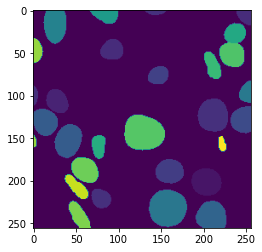

In [94]:
plt.imshow(img2+img1)

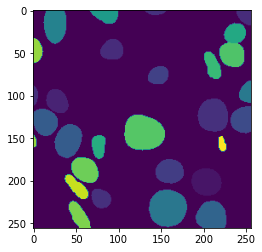

In [95]:
plt.imshow(img4+img3)

In [96]:
len(v4)

30

In [97]:
len(v2)

30

In [98]:
len(v3)

1

In [99]:
len(v4)

30

In [100]:
df2=pd.DataFrame({'name': l_p,'GT_CD3P':lst_p,'Pred_CD3P':l_tf_p,'GT_CD3N':lst_n,'Pred_CD3N':l_tf_n})
df2

,name,GT_CD3P,Pred_CD3P,GT_CD3N,Pred_CD3N
0,000000.npy,2,1,2,3
1,000001.npy,3,1,1,3
2,000002.npy,3,1,8,10
3,000003.npy,3,1,9,11
4,000004.npy,1,1,1,1
...,...,...,...,...,...
489,000489.npy,4,1,11,14
490,000490.npy,5,1,13,17
491,000491.npy,1,1,1,1
492,000492.npy,5,1,11,15


In [101]:
df2.to_csv(path_store+"/CD68_Same_section_gt_July2024.csv",index=False)

In [102]:
df2

,name,GT_CD3P,Pred_CD3P,GT_CD3N,Pred_CD3N
0,000000.npy,2,1,2,3
1,000001.npy,3,1,1,3
2,000002.npy,3,1,8,10
3,000003.npy,3,1,9,11
4,000004.npy,1,1,1,1
...,...,...,...,...,...
489,000489.npy,4,1,11,14
490,000490.npy,5,1,13,17
491,000491.npy,1,1,1,1
492,000492.npy,5,1,11,15


In [103]:
data #accuracy, f1, auc/roc graph

,Name,TP,TN,FN,FP,Accuracy,F1 Score,Sensitivity,Specificity


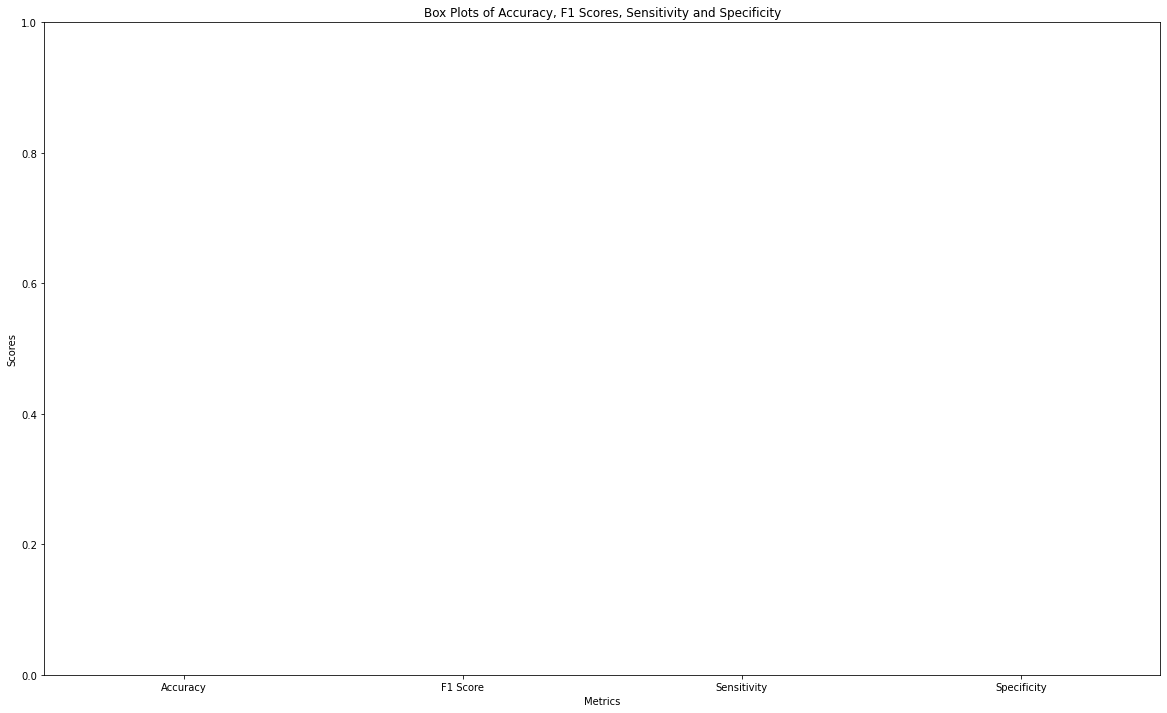

In [104]:
accuracy_scores = data['Accuracy']
f1_scores = data['F1 Score']
sens = data['Sensitivity']
spec = data['Specificity']


# Create a DataFrame for box plot
data_for_box_plot = pd.DataFrame({'Accuracy': accuracy_scores, 'F1 Score': f1_scores, 'Sensitivity': sens, 'Specificity': spec})

# Create box plots using Seaborn
plt.figure(figsize=(20, 12))
sns.boxplot(data=data_for_box_plot, palette='Set2')

# Set plot labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Box Plots of Accuracy, F1 Scores, Sensitivity and Specificity')

# Show the plot
plt.show()

/tmp/ipykernel_2222402/641481658.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data_for_kde_plot, fill=True, palette='Set2', common_norm=False)


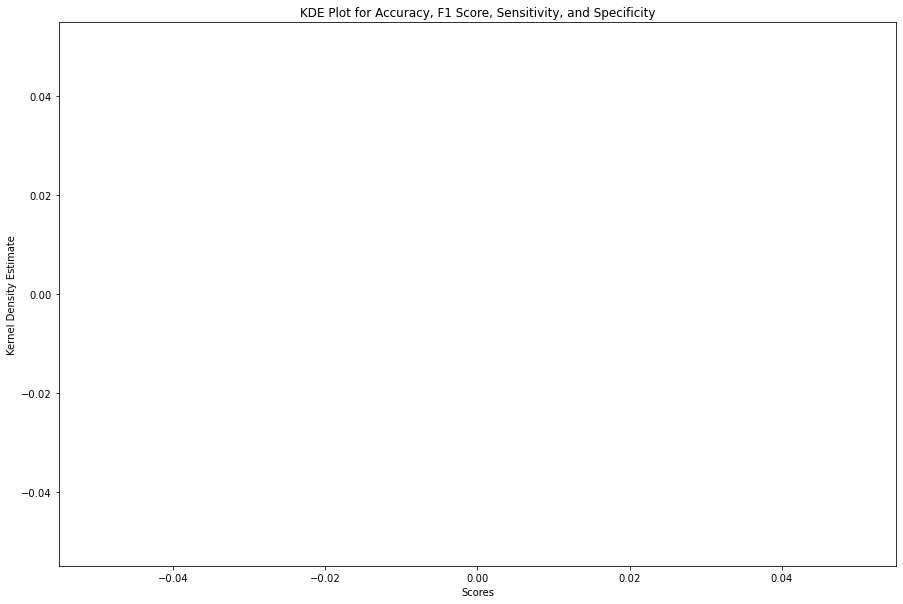

In [105]:
accuracy_scores = data['Accuracy']
f1_scores = data['F1 Score']
sensitivity_scores = data['Sensitivity']
specificity_scores = data['Specificity']

# Create a DataFrame for KDE plot
data_for_kde_plot = pd.DataFrame({
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Sensitivity': sensitivity_scores,
    'Specificity': specificity_scores
})

# Create KDE plots using Seaborn
plt.figure(figsize=(15, 10))
sns.kdeplot(data=data_for_kde_plot, fill=True, palette='Set2', common_norm=False)

# Set plot labels and title
plt.xlabel('Scores')
plt.ylabel('Kernel Density Estimate')
plt.title('KDE Plot for Accuracy, F1 Score, Sensitivity, and Specificity')

# Show the plot
plt.show()

In [27]:
plt.figure(figsize=(15,15))
plt.imshow(img5)

NameError: name 'img5' is not defined

<Figure size 1080x1080 with 0 Axes>

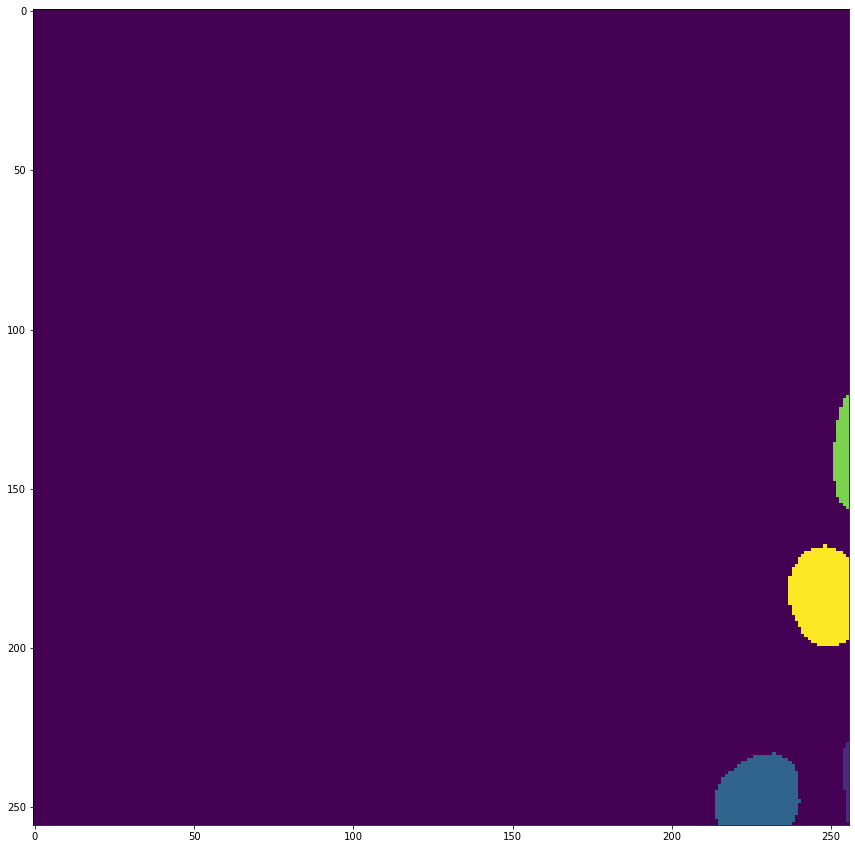

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(img4)

In [29]:
plt.figure(figsize=(15,15))
plt.imshow(b)

NameError: name 'b' is not defined

<Figure size 1080x1080 with 0 Axes>

In [8]:
v2,c2=np.unique(c,return_counts=True)

In [10]:
len(v2)

1320

In [53]:
img1=np.load(cd3p_gt[0])
v1,c1=np.unique(img1,return_counts=True)


In [57]:
np.unique(img1)

array([0], dtype=int32)